In [1]:
from __future__ import print_function
import torch

import torch.optim as optim
from torchvision import datasets, transforms

from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
import utils

In [1]:
git clone https://github.com/dusaurabh/Saurabh-ERA-V2-Master.git

SyntaxError: invalid syntax (4184115792.py, line 1)

In [2]:
from utils import train_transforms, test_transforms, train_test_data_loader, get_training_images

In [3]:
class CIFAR10Dataset(datasets.CIFAR10):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]
        if self.transforms is not None:
          transformed = self.transform(image=image)
          image = transformed["image"]
        return image, label

In [4]:
train = CIFAR10Dataset(root='./data', train=True, transform=train_transforms, download=True)
test = CIFAR10Dataset(root='./data', train=False, transform=test_transforms, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_loader, test_loader = train_test_data_loader(train,test)

CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


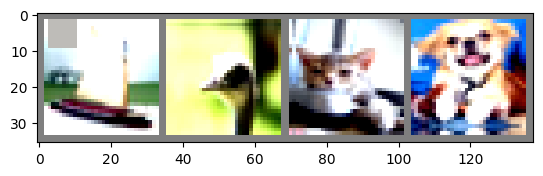

'ship  bird  cat   dog  '

In [6]:
get_training_images(train_loader)

In [7]:
from models import ResNet

In [11]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet().to(device)
model_copy =  ResNet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 128, 16, 16]         147,456
      BatchNorm2d-14          [-1,

In [9]:
from torch.optim.lr_scheduler import OneCycleLR

LRMIN = 1.91E-01/100
LRMAX = 1.91E-01
print('LRMIN ',LRMIN)
print('LRMAX ',LRMAX)

LRMIN  0.00191
LRMAX  0.191


In [12]:
optimizer_copy = optim.Adam(model_copy.parameters(), lr=LRMIN)  # Set initial LR to 0.01
scheduler = OneCycleLR(optimizer_copy, max_lr=LRMAX, total_steps=25, epochs=5, steps_per_epoch=len(train_loader), pct_start=0.3, anneal_strategy='linear', div_factor=10.0, three_phase=False, final_div_factor=1e4, base_momentum=0.85, max_momentum=0.95)

EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    utils.train(model_copy, device, train_loader, optimizer_copy, epoch)
    utils.test(model_copy, device, test_loader)
    scheduler.step()

EPOCH: 0


Loss=2.1803746223449707 Batch_id=97 Accuracy=9.99: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]



Test set: Average loss: 2.2098, Accuracy: 1248/10000 (12.48%)

EPOCH: 1


Loss=1.6691985130310059 Batch_id=97 Accuracy=23.13: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]



Test set: Average loss: 1.9301, Accuracy: 2874/10000 (28.74%)

EPOCH: 2


Loss=1.382128119468689 Batch_id=97 Accuracy=41.51: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s] 



Test set: Average loss: 1.3897, Accuracy: 4846/10000 (48.46%)

EPOCH: 3


Loss=1.1552982330322266 Batch_id=97 Accuracy=52.38: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]



Test set: Average loss: 1.1387, Accuracy: 5875/10000 (58.75%)

EPOCH: 4


Loss=0.9954714775085449 Batch_id=97 Accuracy=60.35: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 1.1289, Accuracy: 6019/10000 (60.19%)

EPOCH: 5


Loss=0.8684109449386597 Batch_id=97 Accuracy=64.90: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]



Test set: Average loss: 1.1709, Accuracy: 6051/10000 (60.51%)

EPOCH: 6


Loss=0.8352158069610596 Batch_id=97 Accuracy=67.97: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 1.2199, Accuracy: 5909/10000 (59.09%)

EPOCH: 7


Loss=0.8326122760772705 Batch_id=97 Accuracy=70.99: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]



Test set: Average loss: 0.8176, Accuracy: 7186/10000 (71.86%)

EPOCH: 8


Loss=0.7637774348258972 Batch_id=97 Accuracy=73.47: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 0.7484, Accuracy: 7416/10000 (74.16%)

EPOCH: 9


Loss=0.8158518671989441 Batch_id=97 Accuracy=75.74: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 0.7629, Accuracy: 7411/10000 (74.11%)

EPOCH: 10


Loss=0.5910587906837463 Batch_id=97 Accuracy=77.70: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]



Test set: Average loss: 0.6238, Accuracy: 7855/10000 (78.55%)

EPOCH: 11


Loss=0.5654299259185791 Batch_id=97 Accuracy=79.12: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]



Test set: Average loss: 0.6908, Accuracy: 7637/10000 (76.37%)

EPOCH: 12


Loss=0.47991743683815 Batch_id=97 Accuracy=80.36: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]   



Test set: Average loss: 0.5598, Accuracy: 8094/10000 (80.94%)

EPOCH: 13


Loss=0.48349422216415405 Batch_id=97 Accuracy=81.74: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]



Test set: Average loss: 0.5186, Accuracy: 8188/10000 (81.88%)

EPOCH: 14


Loss=0.5160859227180481 Batch_id=97 Accuracy=82.47: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s] 



Test set: Average loss: 0.4975, Accuracy: 8279/10000 (82.79%)

EPOCH: 15


Loss=0.49252450466156006 Batch_id=97 Accuracy=83.28: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]



Test set: Average loss: 0.5007, Accuracy: 8303/10000 (83.03%)

EPOCH: 16


Loss=0.4464157223701477 Batch_id=97 Accuracy=84.26: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s] 



Test set: Average loss: 0.4315, Accuracy: 8530/10000 (85.30%)

EPOCH: 17


Loss=0.4822341799736023 Batch_id=97 Accuracy=84.91: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s] 



Test set: Average loss: 0.4163, Accuracy: 8567/10000 (85.67%)

EPOCH: 18


Loss=0.44612666964530945 Batch_id=97 Accuracy=85.90: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 0.4074, Accuracy: 8605/10000 (86.05%)

EPOCH: 19


Loss=0.3203910291194916 Batch_id=97 Accuracy=86.64: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s] 



Test set: Average loss: 0.4130, Accuracy: 8598/10000 (85.98%)

EPOCH: 20


Loss=0.34859856963157654 Batch_id=97 Accuracy=87.43: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]



Test set: Average loss: 0.3704, Accuracy: 8756/10000 (87.56%)

EPOCH: 21


Loss=0.39574092626571655 Batch_id=97 Accuracy=88.35: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]



Test set: Average loss: 0.3458, Accuracy: 8818/10000 (88.18%)

EPOCH: 22


Loss=0.3438170850276947 Batch_id=97 Accuracy=88.81: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s] 



Test set: Average loss: 0.3413, Accuracy: 8824/10000 (88.24%)

EPOCH: 23


Loss=0.3284001350402832 Batch_id=97 Accuracy=89.72: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s] 



Test set: Average loss: 0.3242, Accuracy: 8879/10000 (88.79%)

EPOCH: 24


Loss=0.3118174076080322 Batch_id=97 Accuracy=89.91: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s] 



Test set: Average loss: 0.3217, Accuracy: 8888/10000 (88.88%)



# Target

1. Write a Architecture like
	1. PrepLayer - Conv 3x3 s1, p1) >> BN >> RELU [64k]
    
	2. Layer1 -
		1. X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [128k]
		2. R1 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [128k]
		3. Add(X, R1)
     
	3. Layer 2 -
		1. Conv 3x3 [256k]
		2. MaxPooling2D
		3. BN
		4. ReLU
     
	4. Layer 3 
		1. X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [512k]
		2. R2 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [512k]
		3. Add(X, R2)
     
	5. MaxPooling with Kernel Size 4
    
	6. FC Layer
    
	7. SoftMax
2. Uses One Cycle Policy such that:
	1. Total Epochs = 24
	2. Max at Epoch = 5
	3. LRMIN = FIND
	4. LRMAX = FIND
	5. NO Annihilation

3. Uses this transform -RandomCrop 32, 32 (after padding of 4) >> FlipLR >> Followed by CutOut(8, 8)
4. Batch size = 512
5. Use ADAM and CrossEntropyLoss
6. Target Accuracy: 90%
7. NO score if your code is not modular. Your collab must be importing your GitHub package, and then just running the model. 
	I should be able to find the custom_resnet.py model in your MASTER GitHub repo that you'd be training. repo that you'd be training. yLoss
Target Accuracy: 90%

# Result

1. Parameters: 6,614,080

2. Best Train Accuracy: 89.91% at 24th epoch
   
3. Best Test Accuracy: 88.88 at 24th epochh)

# Analysis

1. We have implemented our model like ResNet architecture

2. We implemented Adam optimizer and CrossEntropyLoss and got higher and faster accuracy according to our model architecture and problem statment

3. Used albumentation transformation library of RandomCrop 32, 32 (after padding of 4) >> FlipLR >> Followed by CutOut(8, 8)

4. If we train our model for higher epoch then we can get slighlty more accuracy

5. There is some overfitting in our model as train accuracy is slightly higher than test accuracy